In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import gaussian_filter

In [10]:
# (width,height), from left-top side, . is used to split different targets. 999 is used to label invalid points.
inputData ="0,14.2,-9.24,12.5,19.-1,-5.-18,-1.8,-9.19,17.20,12.999,999"
# inputData =""
# for i in range(300):
#     fakeX = random.randint(-100, 100)
#     fakeY = random.randint(-100, 100)
#     inputData+=str(fakeX)+","+str(fakeY)+"."
# inputData=inputData[:-1]
scoreData = "9,8,9,10,9,10,8,9,8,6"

In [11]:
def parseInputData(inputData:str):
    vectorArray = inputData.split(".")
    vectorArray =[i.split(",") for i in vectorArray]
    vectorArray = [(int(i[0]),int(i[1]))for i in vectorArray]
    return vectorArray

def parseScore(scoreData:str):
    vectorArray = scoreData.split(",")
    vectorArray = [int(i) for i in vectorArray]
    return vectorArray

vectors = parseInputData(inputData)
scores = parseScore(scoreData)
print(vectors)

[(0, 14), (2, -9), (24, 12), (5, 19), (-1, -5), (-18, -1), (8, -9), (19, 17), (20, 12), (999, 999)]


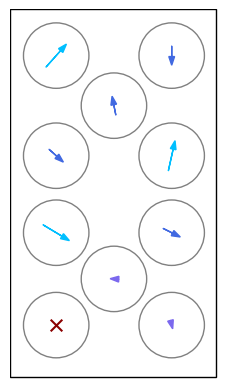

In [12]:
def normalized(vector):
    x=vector[0]
    y=vector[1]
    length = pow(x**2+y**2,0.5)
    return (x/length,y/length)

def addVectors(vector1,vector2,add=True,multipleFactor = 120):
    if add:
        x=vector1[0]+vector2[0]*multipleFactor
        y=vector1[1]+vector2[1]*multipleFactor
    else:
        x=vector1[0]-vector2[0]*multipleFactor
        y=vector1[1]-vector2[1]*multipleFactor
    return (x,y)

def drawArrowGraph(vectors,scores):
    colorList = ["darkred","tomato","sandybrown","orange","gold","greenyellow","palegreen","turquoise","deepskyblue","royalblue","mediumslateblue"]
    centerList = [(240,240+520*i) for i in range(2)]+ [(240,200+480*i) for i in range(2,4)]+ [(540,500),(540,1400)]+[(840,240+520*i) for i in range(2)]+[(840,200+480*i) for i in range(2,4)]
    centerList = [centerList[i] for i in (6,7,8,9,4,5,0,1,2,3)]
    if False and len(vectors)!=10:
        return
    else:
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.set_aspect('equal')
        plt.xlim(0,1080)
        plt.ylim(1920,0)
        plt.axis('off')
        rec = plt.Rectangle((0,0),1070,1910,fill=False)
        ax.add_patch(rec)
        for index in range(len(vectors)):
            circle = plt.Circle((centerList[index][0],centerList[index][1]),170, color = "gray",fill=False)
            ax.add_patch(circle)
            if vectors[index][0]==999:
                ax.scatter(centerList[index][0],centerList[index][1],70,marker="x",color=colorList[0])
            elif scores[index]<=5:
                ax.scatter(centerList[index][0],centerList[index][1],70,marker="x",color=colorList[0])
            else:
                normalizedVector = normalized(vectors[index])
                tailPoint= addVectors(centerList[index],normalizedVector,False,320-scores[index]*30)
                headPoint = addVectors(centerList[index],normalizedVector,True,320-scores[index]*30)
                
                ax.arrow(tailPoint[0],tailPoint[1],headPoint[0]-tailPoint[0],headPoint[1]-tailPoint[1],length_includes_head = True, head_width = 30,color=colorList[scores[index]])
        plt.show()
        # fig.savefig('auto.png')

drawArrowGraph(vectors,scores)

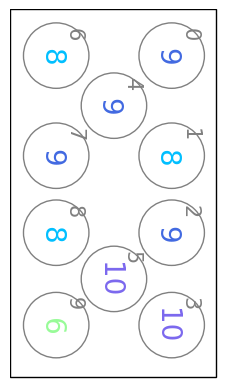

In [13]:
def drawScoreGraph(vectors,scores):
    colorList = ["darkred","tomato","sandybrown","orange","gold","greenyellow","palegreen","turquoise","deepskyblue","royalblue","mediumslateblue"]
    centerList = [(240,240+520*i) for i in range(2)]+ [(240,200+480*i) for i in range(2,4)]+ [(540,500),(540,1400)]+[(840,240+520*i) for i in range(2)]+[(840,200+480*i) for i in range(2,4)]
    centerList = [centerList[i] for i in (6,7,8,9,4,5,0,1,2,3)]
    if False and len(vectors)!=10:
        return
    else:
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.set_aspect('equal')
        plt.xlim(0,1080)
        plt.ylim(1920,0)
        plt.axis('off')
        rec = plt.Rectangle((0,0),1070,1910,fill=False)
        ax.add_patch(rec)
        for index in range(len(vectors)):
            circle = plt.Circle((centerList[index][0],centerList[index][1]),170, color = "gray",fill=False)
            ax.add_patch(circle)
            ax.text(centerList[index][0]+40,centerList[index][1]-100,str(index),fontsize=15,color="gray",rotation=270)
            # if vectors[index][0]==999:
            #     ax.scatter(centerList[index][0],centerList[index][1],70,marker="x",color=colorList[0])
            if scores[index]<=5:
                ax.scatter(centerList[index][0],centerList[index][1],70,marker="x",color=colorList[0])
            else:
                if scores[index]==10:
                    ax.text(centerList[index][0]-100,centerList[index][1]+60,str(scores[index]),fontsize=20,color=colorList[scores[index]],rotation=270)
                else:
                    ax.text(centerList[index][0]-100,centerList[index][1]+20,str(scores[index]),fontsize=20,color=colorList[scores[index]],rotation=270)
        plt.show()
        # fig.savefig('auto.png')
drawScoreGraph(vectors,scores)

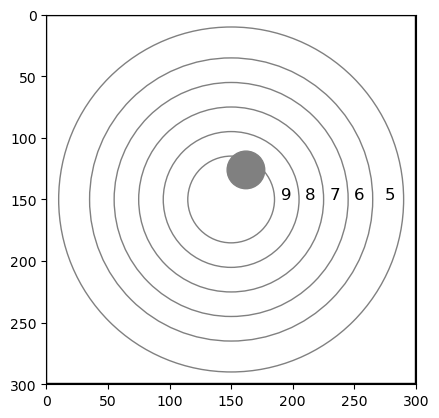

In [14]:
def drawCircleGraph(vector):
    colorList = ["darkred","tomato","sandybrown","orange","gold","greenyellow","palegreen","turquoise","deepskyblue","royalblue","mediumslateblue"]
    centerList = [(240,240+520*i) for i in range(2)]+ [(240,200+480*i) for i in range(2,4)]+ [(540,500),(540,1400)]+[(840,240+520*i) for i in range(2)]+[(840,200+480*i) for i in range(2,4)]
    centerList = [centerList[i] for i in (6,7,8,9,4,5,0,1,2,3)]
    radiusSet=[x/2 for x in (12.92,20.23,27.55,34.86,42.18,51.39)]
    bulletSize=5.6/2

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    plt.xlim(0,300)
    plt.ylim(300,0)
    plt.axis('on')
    center=(150,150)
    rec = plt.Rectangle((0,0),299,299,fill=False)
    ax.add_patch(rec)
    
    for i in range(len(radiusSet)):
        circle = plt.Circle((center[0],center[1]),radiusSet[i]/radiusSet[-1]*140, color = "gray",fill=False)
        ax.add_patch(circle)
        if i>0:
            ax.text(center[0]+radiusSet[i]/radiusSet[-1]*140-15,center[1],str(10-i),fontsize=12)
    if vector[0]!=999:
        point = addVectors(center,(vector[1],-vector[0]),multipleFactor=1)
        circle = plt.Circle((point[0],point[1]),bulletSize/radiusSet[-1]*140, color = "gray",fill=True)
        ax.add_patch(circle)
        # ax.scatter(point[0],point[1],bulletSize/radiusSet[-1]*140,marker="o")
    plt.show()
    # fig.savefig('auto.png')
drawCircleGraph(vectors[2])

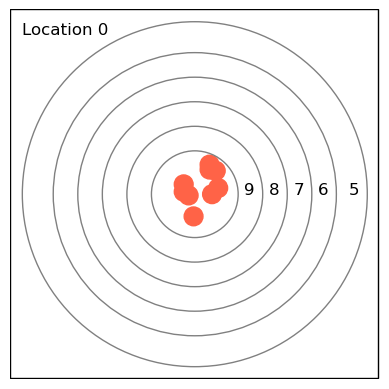

In [15]:
# didn't use it in the app
def drawHeatmapGraph(vectors,location=0):
    colorList = ["darkred","tomato","sandybrown","orange","gold","greenyellow","palegreen","turquoise","deepskyblue","royalblue","mediumslateblue"]
    
    radiusSet=[x/2 for x in (12.92,20.23,27.55,34.86,42.18,51.39)]
    bulletSize=5.6/2

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    plt.xlim(0,300)
    plt.ylim(300,0)
    plt.axis('off')
    center=(150,150)
    rec = plt.Rectangle((0,0),299,299,fill=False)
    ax.add_patch(rec)
    ax.text(10,20,"Location "+str(location),fontsize=12)
    
    for vector in vectors:
        if vector[0]!=999:
            point = addVectors(center,(vector[1],-vector[0]),multipleFactor=1)
            circle = plt.Circle((point[0],point[1]),bulletSize/radiusSet[-1]*140/2, color = colorList[1],fill=True)
            ax.add_patch(circle)
            # ax.scatter(point[0],point[1],bulletSize/radiusSet[-1]*140,marker="o")
    for i in range(len(radiusSet)):
        circle = plt.Circle((center[0],center[1]),radiusSet[i]/radiusSet[-1]*140, color = "gray",fill=False)
        ax.add_patch(circle)
        if i>0:
            ax.text(center[0]+radiusSet[i]/radiusSet[-1]*140-15,center[1],str(10-i),fontsize=12)
    plt.show()
    # fig.savefig('auto.png')
drawHeatmapGraph(vectors)

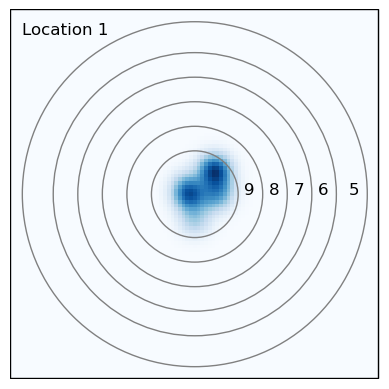

In [16]:
def drawRealHeatmap(vectors,location=1):
    radiusSet=[x/2 for x in (12.92,20.23,27.55,34.86,42.18,51.39)]
    bulletSize=5.6/2
    
    SPLIT_NUM = 100
    # generate 2 2d grids for the x & y bounds
    y, x = np.meshgrid(np.linspace(0, 300, SPLIT_NUM), np.linspace(0, 300, SPLIT_NUM))

    z = np.zeros((SPLIT_NUM,SPLIT_NUM))
    center=(150,150)

    for vector in vectors:
        if vector[0]!=999:
            point = addVectors(center,(vector[1],-vector[0]),multipleFactor=1)
            indexs = (point[0]//(300//SPLIT_NUM),point[1]//(300//SPLIT_NUM))
            z[indexs[0],indexs[1]]+=1

    z = gaussian_filter(z,sigma=3)
    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z = z[:-1, :-1]
    z_min, z_max = 0, np.abs(z).max()
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    plt.xlim(0,300)
    plt.ylim(300,0)
    plt.axis('off')
    c = ax.pcolormesh(x, y, z, cmap='Blues', vmin=z_min, vmax=z_max)
    rec = plt.Rectangle((0,0),299,299,fill=False)
    ax.add_patch(rec)
    ax.text(10,20,"Location "+str(location),fontsize=12)
    for i in range(len(radiusSet)):
        circle = plt.Circle((center[0],center[1]),radiusSet[i]/radiusSet[-1]*140, color = "gray",fill=False)
        ax.add_patch(circle)
        if i>0:
            ax.text(center[0]+radiusSet[i]/radiusSet[-1]*140-15,center[1],str(10-i),fontsize=12)
    # set the limits of the plot to the limits of the data
    # ax.axis([x.min(), x.max(), y.min(), y.max()])
    # fig.colorbar(c, ax=ax)

    plt.show()

drawRealHeatmap(vectors)